In [2]:
from sqlalchemy import create_engine
import psycopg2
import pandas as pd

DATABASE_TYPE = 'postgresql'
DBAPI = 'psycopg2'
ENDPOINT = '' # Change it for your AWS endpoint
USER = 'postgres'
#PASSWORD = str(input('Database Password: '))
PASSWORD = ''
PORT = 5432
DATABASE = 'postgres'
engine = create_engine(f"{DATABASE_TYPE}+{DBAPI}://{USER}:{PASSWORD}@{ENDPOINT}:{PORT}/{DATABASE}")

cur = engine.execute(f"SELECT * FROM products WHERE id='fffbb9f5-423d-470a-a0d5-018177258d8b'")

cur.fetchall()


# cur = conn.cursor()

# cur.execute("SELECT * FROM products WHERE id='fffbb9f5-423d-470a-a0d5-018177258d8b'")
# print(cur.fetchall())

[(UUID('fffbb9f5-423d-470a-a0d5-018177258d8b'), 'Kingston HyperX Beast 16GB (2x8GB) PC3-17100C11 2133MHz Dual Channel R | in Brighton, East Sussex | Gumtree', 'Computers & Software / Computers, Laptops & Netbooks / Memory, Motherboards & Processors', 'Gaming PC RAM Kingston HyperX Beast 16GB Kit (2 x 8GB) DDR3-2133MHz Memory\r Memory Technology:\tDDR3 SDRAM\rMemory Form Factor:\tDIMM 240-pin\rMemory Modules Quantity:\t2\rMemory Speed:\t2133MHz (PC3-17000)\rCAS Latency:\tCL11', '£80.00', 'Brighton, East Sussex', 1422093138, datetime.date(2022, 2, 27))]

In [3]:
df = pd.read_sql('products', engine)

(df.head())

,id,product_name,category,product_description,price,location,page_id,create_time
0,ac2140ae-f0d5-4fe7-ac08-df0f109fd734,"Second-Hand Sofas, Couches & Armchairs for Sal...",N/A,N/A,N/A,N/A,1426592234,2022-02-26
1,243809c0-9cfc-4486-ad12-3b7a16605ba9,"Mirror wall art | in Wokingham, Berkshire | Gu...","Home & Garden / Dining, Living Room Furniture ...","Mirror wall art. Posted by Nisha in Dining, Li...",£5.00,"Wokingham, Berkshire",1426704584,2022-02-26
2,1c58d3f9-8b93-47ea-9415-204fcc2a22e6,"Stainless Steel Food Steamer | in Inverness, H...",Home & Garden / Other Household Goods,Morphy Richard’s (model no 48755)Stainless ste...,£20.00,"Inverness, Highland",1426704579,2022-02-26
3,860673f1-57f6-47ba-8d2f-13f9e05b8f9a,"Sun loungers | in Skegness, Lincolnshire | Gum...",Home & Garden / Garden & Patio / Outdoor Setti...,I have 2 of these - collection only as I don’t...,£20.00,"Skegness, Lincolnshire",1426704576,2022-02-26
4,59948726-29be-4b35-ade5-bb2fd7331856,Coffee side table from Ammunition ammo box hai...,"Home & Garden / Dining, Living Room Furniture ...",Great reclaimed army ammunition box used as co...,£115.00,"Radstock, Somerset",1426704575,2022-02-26


In [1]:
lambda x: 5+x

<function __main__.<lambda>(x)>

In [3]:
df.dtypes # Find the object types for each column. Make sure every column has correct data type.

id                             object
product_name                   object
category                       object
product_description            object
price                          object
location                       object
page_id                         int64
create_time            datetime64[ns]
dtype: object

In [4]:
df.info() # Find the object types and number of nulls using .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8091 entries, 0 to 8090
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   8091 non-null   object        
 1   product_name         8091 non-null   object        
 2   category             8091 non-null   object        
 3   product_description  8091 non-null   object        
 4   price                8091 non-null   object        
 5   location             8091 non-null   object        
 6   page_id              8091 non-null   int64         
 7   create_time          8091 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 505.8+ KB


In [ ]:
df['price'].sum() # This is not ideal

In [5]:
questionable_columns = ['id','product_name','price', 'category','product_description', 'location', 'page_id','create_time']
na_counts = {col: 0 for col in questionable_columns}
for col in questionable_columns:
    na_counts[col] = df[col][df[col] == 'N/A'].count()
    
print(na_counts)

{'id': 0, 'product_name': 0, 'price': 935, 'category': 935, 'product_description': 935, 'location': 935, 'page_id': 0, 'create_time': 0}


Matplotlib is building the font cache; this may take a moment.


<AxesSubplot:>

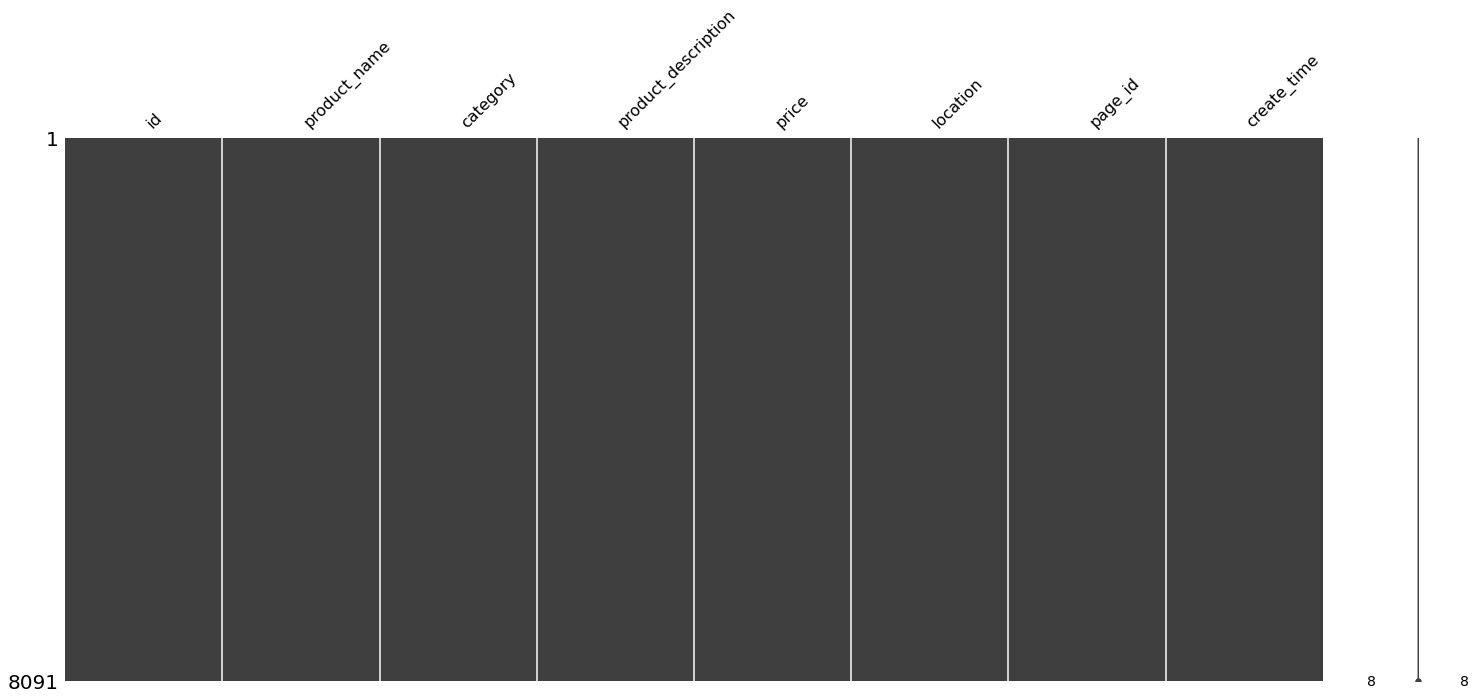

In [6]:
import missingno as msno
msno.matrix(df)

In [ ]:
df = df[df['EPS'].notna()]

In [9]:
df['price'] = df['price'].str.strip('£')
df['price'] = df['price'].astype('float64') # this doesn't work as some rows have 'N/A' which are str
df['price'].sum() 

ValueError: could not convert string to float: 'N/A'

In [14]:
df['category'].describe()

count     8091
unique     436
top        N/A
freq       935
Name: category, dtype: object

In [11]:
df['category']

0                                                     N/A
1       Home & Garden / Dining, Living Room Furniture ...
2                   Home & Garden / Other Household Goods
3       Home & Garden / Garden & Patio / Outdoor Setti...
4       Home & Garden / Dining, Living Room Furniture ...
                              ...                        
8086    Video Games & Consoles / Consoles / PS4 (Sony ...
8087                                                  N/A
8088    Video Games & Consoles / Other Video Games & C...
8089    Video Games & Consoles / Video Game Accessorie...
8090                       Video Games & Consoles / Games
Name: category, Length: 8091, dtype: object

In [12]:
df.duplicated().sum() #check if any full duplicates, True = 1 so if duplicates the sum > 0 

0

In [14]:
columns = ['product_name','id']
df.duplicated('category','first').sum() #number of duplicates for this column(s)

7655

In [13]:
df.sort_values(by = ['product_name']) 

,id,product_name,category,product_description,price,location,page_id,create_time
6625,3b85f391-8987-45c3-bf26-57a5c6fbec32,"""Benefit"" collectable make-up sets | in Newcas...",Health & Beauty / Make Up & Cosmetics,"""Benefit"" birthday cake and Mini van. Never us...",£30.00,"Newcastle, Tyne and Wear",1423439515,2022-02-27
4233,9f064c54-ef21-46b4-8fd2-83d215c5f0e8,'Game Of Life Zapped' Board Game (new) | in R...,"Music, Films, Books & Games / Games & Board Games",New & unused.\r Buy three £10 games for £20 (p...,£10.00,"Reading, Berkshire",1426719548,2022-02-27
4428,c286676d-6b75-4eed-a87e-f120d6d39d63,'Magic The Gathering' Starter Game & Video (19...,"Music, Films, Books & Games / Games & Board Games",Game in good condition: Video new & sealed.\r ...,£100.00,"Reading, Berkshire",1426714756,2022-02-27
547,4745bfb2-4700-4694-b183-da7594ec7f6a,'Salem' by Philip Martin - LIMITED Edition pri...,"Home & Garden / Dining, Living Room Furniture ...",'Salem' by Philip Martin - LIMITED Edition pri...,£10.00,"Toton, Nottinghamshire",1255422328,2022-02-26
4410,e3c0ee9f-88b1-4101-81a5-705fdeaff9c1,'The Famous Robin Hood' Card Game | in Readin...,"Music, Films, Books & Games / Games & Board Games",In good condition.\r Willing to accept certain...,£50.00,"Reading, Berkshire",1426715375,2022-02-27
...,...,...,...,...,...,...,...,...
827,002c3592-a0c2-45c3-a5a7-6cef51fe3fc3,"🔥🔥🔥log burners🔥🔥🔥🔥🔥🔥🔥 | in Kelty, Fife | Gumtree",Home & Garden / Garden & Patio / Barbeques & O...,Log burners available Deposits may be required...,£70.00,"Kelty, Fife",1426705580,2022-02-26
1375,2a5101ae-0797-411e-bcdb-f42116df8bad,🚒 FAST POSTAGE ! Men Women Boys Girls Tracksui...,"Clothes, Footwear & Accessories / Men's Clothi...",BRAND NEW and HIGH QUALITY !\r BUY IT NOW 👉 h...,£20.00,"East Croydon, London",1422660590,2022-02-26
3574,d916693d-854b-4a70-80cf-36bf014f8d1e,🛎 TOWER T24021 DIGITAL SOLO MICROWAVE - BLACK ...,Appliances / Small Appliances / Microwave Ovens,Only collection 🛎 TOWER T24021 DIGITAL SOLO MI...,£80.00,"Haringey, London",1423933915,2022-02-27
6667,dd90a0e5-c147-4549-a7fe-10a66d84058e,🟩 1 X Perching Chair & 1 X Stool | in Atherton...,"Health & Beauty / Mobility, Disability & Medical",☀️NO TXTS☀️\r🔹️Used good condition\r£10 for Ch...,£18.00,"Atherton, Manchester",1426695639,2022-02-27


In [6]:
df.isna().sum()

id                     0
product_name           0
category               0
product_description    0
price                  0
location               0
page_id                0
create_time            0
dtype: int64

In [9]:
df.shape

(8091, 8)

In [33]:
data = df.loc[df["price"] != 'N/A'] #removes all rows with 'N/A' for prices
data.shape

(7156, 13)

In [13]:
data['price'] = data['price'].str.strip('£')
data['price'] = data['price'].astype('float64') #there are still commas in our strings so need to get rid of that
data['price'].sum() 

/tmp/ipykernel_99363/350580167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price'] = data['price'].str.strip('£')


ValueError: could not convert string to float: '1,900.00'

In [14]:
data["price"] = [float(str(i).replace(",", "")) for i in data["price"]]

/tmp/ipykernel_99363/3674291866.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["price"] = [float(str(i).replace(",", "")) for i in data["price"]]


In [16]:
data['price'] = data['price'].astype('float64') 
data['price'].sum() # now we see it behaves like a float

/tmp/ipykernel_99363/1406945763.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price'] = data['price'].astype('float64')


16133412.840000002

In [17]:
data['category'].describe() # we will use this to split items into categories

count                                                7156
unique                                                435
top       Other Goods / Hobbies, Interests & Collectibles
freq                                                  286
Name: category, dtype: object

In [18]:
data['product_name'].describe()

count                                                  7156
unique                                                 7095
top       Various Original Albums from collection / All ...
freq                                                      4
Name: product_name, dtype: object

In [19]:
data['category'] = data['category'].astype('category') #set this to category type

/tmp/ipykernel_99363/187651687.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['category'] = data['category'].astype('category')


In [20]:
data.dtypes

id                             object
product_name                   object
category                     category
product_description            object
price                         float64
location                       object
page_id                         int64
create_time            datetime64[ns]
dtype: object

In [21]:
data['location'].describe()

count                       7156
unique                      1610
top       Southampton, Hampshire
freq                         155
Name: location, dtype: object

In [22]:
data['location'] = data['location'].astype('category')

/tmp/ipykernel_99363/2931533880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['location'] = data['location'].astype('category')


In [23]:
data.dtypes

id                             object
product_name                   object
category                     category
product_description            object
price                         float64
location                     category
page_id                         int64
create_time            datetime64[ns]
dtype: object

In [67]:
data.describe()

,price,page_id
count,7.156000e+03,7.156000e+03
mean,2.254529e+03,1.419364e+09
std,1.208243e+05,2.165159e+07
min,0.000000e+00,1.015227e+09
25%,1.000000e+01,1.423359e+09
50%,4.000000e+01,1.426703e+09
75%,1.500000e+02,1.426714e+09
max,1.000000e+07,1.426727e+09


In [68]:
data['category'] = data['category'].cat.codes

/tmp/ipykernel_99363/2074916257.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['category'] = data['category'].cat.codes


In [73]:
data['location'] = data['location'].cat.codes

/tmp/ipykernel_99363/1506013526.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['location'] = data['location'].cat.codes


In [27]:
data.drop(columns=['product_description']) #remove this column as does not provide anything important

,id,product_name,category,price,location,page_id,create_time
1,243809c0-9cfc-4486-ad12-3b7a16605ba9,"Mirror wall art | in Wokingham, Berkshire | Gu...","Home & Garden / Dining, Living Room Furniture ...",5.0,"Wokingham, Berkshire",1426704584,2022-02-26
2,1c58d3f9-8b93-47ea-9415-204fcc2a22e6,"Stainless Steel Food Steamer | in Inverness, H...",Home & Garden / Other Household Goods,20.0,"Inverness, Highland",1426704579,2022-02-26
3,860673f1-57f6-47ba-8d2f-13f9e05b8f9a,"Sun loungers | in Skegness, Lincolnshire | Gum...",Home & Garden / Garden & Patio / Outdoor Setti...,20.0,"Skegness, Lincolnshire",1426704576,2022-02-26
4,59948726-29be-4b35-ade5-bb2fd7331856,Coffee side table from Ammunition ammo box hai...,"Home & Garden / Dining, Living Room Furniture ...",115.0,"Radstock, Somerset",1426704575,2022-02-26
5,16dbc860-696e-4cda-93f6-4dd4926573fb,Modern Shannon Sofa for sale at low cost | in ...,"Home & Garden / Dining, Living Room Furniture ...",450.0,"Delph, Manchester",1426704570,2022-02-26
...,...,...,...,...,...,...,...
8085,c4148656-78a9-4f3e-b393-134fdc5ef900,Sony PlayStation VR Move Bundle | in Acocks Gr...,Video Games & Consoles / Consoles / PS4 (Sony ...,260.0,"Acocks Green, West Midlands",1422159237,2022-02-28
8086,564e3411-768d-4250-a624-b119d696f103,"Playstation VR V2 Bundle | in Acocks Green, We...",Video Games & Consoles / Consoles / PS4 (Sony ...,235.0,"Acocks Green, West Midlands",1422159464,2022-02-28
8088,2b0a652b-46a2-4297-b619-5efeeb222787,"Oculus quest 2 256gb | in Montrose, Angus | Gu...",Video Games & Consoles / Other Video Games & C...,250.0,"Montrose, Angus",1426668818,2022-02-28
8089,719fd40a-870e-4144-b324-55dff2e66fb4,Logitech driving force shifter | in Carrickfer...,Video Games & Consoles / Video Game Accessorie...,30.0,"Carrickfergus, County Antrim",1426699715,2022-02-28


In [30]:
data.to_csv('clean_data.csv', index=False)
df.to_csv('test_data.csv', index=False)

In [74]:
data.head()

,id,product_name,category,product_description,price,location,page_id,create_time
1,243809c0-9cfc-4486-ad12-3b7a16605ba9,"Mirror wall art | in Wokingham, Berkshire | Gu...",251,"Mirror wall art. Posted by Nisha in Dining, Li...",5.0,1582,1426704584,2022-02-26
2,1c58d3f9-8b93-47ea-9415-204fcc2a22e6,"Stainless Steel Food Steamer | in Inverness, H...",290,Morphy Richard’s (model no 48755)Stainless ste...,20.0,771,1426704579,2022-02-26
3,860673f1-57f6-47ba-8d2f-13f9e05b8f9a,"Sun loungers | in Skegness, Lincolnshire | Gum...",275,I have 2 of these - collection only as I don’t...,20.0,1295,1426704576,2022-02-26
4,59948726-29be-4b35-ade5-bb2fd7331856,Coffee side table from Ammunition ammo box hai...,252,Great reclaimed army ammunition box used as co...,115.0,1181,1426704575,2022-02-26
5,16dbc860-696e-4cda-93f6-4dd4926573fb,Modern Shannon Sofa for sale at low cost | in ...,255,New Design Shannon Corner sofa 5 Seater Avail...,450.0,443,1426704570,2022-02-26


/home/abdul/miniconda3/envs/mle_env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='create_time', ylabel='price'>

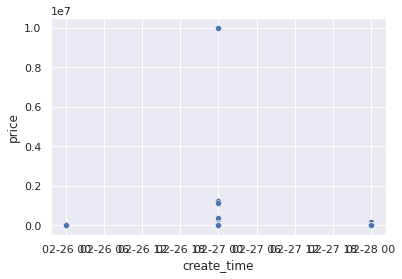

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set()
x = data['create_time']
y = data ['price']
sns.scatterplot(x,y)
# plt.plot(x, y)
# plt.show()

In [86]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics

features = ['page_id','category']

#X = data.drop('price',axis =1)
X = data[features]
y = data['price']

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3)

print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)



(5009, 2)
(5009,)
(2147, 2)
(2147,)


In [87]:
model = linear_model.LinearRegression()

model.fit(train_X, train_y)
y_pred = model.predict(test_X)

/home/abdul/miniconda3/envs/mle_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name']. An error will be raised in 1.2.
  warnings.warn(
/home/abdul/miniconda3/envs/mle_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name']. An error will be raised in 1.2.
  warnings.warn(


In [88]:
from sklearn.metrics import mean_squared_error, r2_score 
import numpy as np

def calculate_metrics(y_test, y_pred):  
    ''' 
    y_test:- ground truth 
    y_pred:- model predict  
    '''
    mse = mean_squared_error(test_y, y_pred) 
    rmse = np.sqrt(mse) 
    r2_scores = r2_score(test_y, y_pred) 
    
    print("MSE: ", mse) 
    print("RMSE: ", rmse) 
    print("R2_score: ", r2_scores) 
    
calculate_metrics(test_y, y_pred)

MSE:  724647335.4954201
RMSE:  26919.274423643372
R2_score:  -0.005564078809918049


In [9]:
col = 'category'
no_cols = 5
character = '/'
df[[col+str(i) for i in range(no_cols)]] = (df[col].str.split(character, expand=True))
df2 = df.drop(col, axis=1)
for i in range(no_cols):
            if i > 2:
                df3 = df2.drop(col+str(i), axis=1) 
df3.head(200)

,id,product_name,product_description,price,location,page_id,create_time,category0,category1,category2,category3
0,ac2140ae-f0d5-4fe7-ac08-df0f109fd734,"Second-Hand Sofas, Couches & Armchairs for Sal...",N/A,N/A,N/A,1426592234,2022-02-26,N,A,None,None
1,243809c0-9cfc-4486-ad12-3b7a16605ba9,"Mirror wall art | in Wokingham, Berkshire | Gu...","Mirror wall art. Posted by Nisha in Dining, Li...",£5.00,"Wokingham, Berkshire",1426704584,2022-02-26,Home & Garden,"Dining, Living Room Furniture","Mirrors, Clocks & Ornaments",None
2,1c58d3f9-8b93-47ea-9415-204fcc2a22e6,"Stainless Steel Food Steamer | in Inverness, H...",Morphy Richard’s (model no 48755)Stainless ste...,£20.00,"Inverness, Highland",1426704579,2022-02-26,Home & Garden,Other Household Goods,None,None
3,860673f1-57f6-47ba-8d2f-13f9e05b8f9a,"Sun loungers | in Skegness, Lincolnshire | Gum...",I have 2 of these - collection only as I don’t...,£20.00,"Skegness, Lincolnshire",1426704576,2022-02-26,Home & Garden,Garden & Patio,Outdoor Settings & Furniture,None
4,59948726-29be-4b35-ade5-bb2fd7331856,Coffee side table from Ammunition ammo box hai...,Great reclaimed army ammunition box used as co...,£115.00,"Radstock, Somerset",1426704575,2022-02-26,Home & Garden,"Dining, Living Room Furniture",Other,None
...,...,...,...,...,...,...,...,...,...,...,...
195,c374f5ed-0f8e-4cbd-8d08-384d3b500351,Pair of Stag Minstrel Bedside Drawers / Bedsid...,A pair of Black Stag Minstrel bedside tables w...,£125.00,"Solihull, West Midlands",1426702525,2022-02-26,Home & Garden,Beds & Bedroom Furniture,Bedside Tables,None
196,b62d8acb-a674-4892-970a-87b5c0db5f0f,Other Bedroom Furniture for Sale in Bournemout...,N/A,N/A,N/A,1423737083,2022-02-26,N,A,None,None
197,21ce5b1c-3d1f-4e8d-b23f-0d61079712d9,"Wall and Floor Tiles | in Sunderland, Tyne and...",12 boxes x 20 tiles \r6 boxes matching floor t...,£100.00,"Sunderland, Tyne and Wear",1425685056,2022-02-26,Home & Garden,Other Household Goods,None,None
198,1910df44-c471-4552-a87c-de6a4415fc01,"Coffee table | in Sidcup, London | Gumtree",Solid very heavy coffee table with draw. Colle...,£120.00,"Sidcup, London",1426409804,2022-02-26,Home & Garden,"Dining, Living Room Furniture",Coffee table,None


In [42]:
data['category0'].describe()

count               7156
unique                13
top       Home & Garden 
freq                 834
Name: category0, dtype: object

In [39]:
data.head()

,id,product_name,category,product_description,price,location,page_id,create_time,category0,category1,category2,category3,category4
1,243809c0-9cfc-4486-ad12-3b7a16605ba9,"Mirror wall art | in Wokingham, Berkshire | Gu...","Home & Garden / Dining, Living Room Furniture ...","Mirror wall art. Posted by Nisha in Dining, Li...",£5.00,"Wokingham, Berkshire",1426704584,2022-02-26,Home & Garden,"Dining, Living Room Furniture","Mirrors, Clocks & Ornaments",None,None
2,1c58d3f9-8b93-47ea-9415-204fcc2a22e6,"Stainless Steel Food Steamer | in Inverness, H...",Home & Garden / Other Household Goods,Morphy Richard’s (model no 48755)Stainless ste...,£20.00,"Inverness, Highland",1426704579,2022-02-26,Home & Garden,Other Household Goods,None,None,None
3,860673f1-57f6-47ba-8d2f-13f9e05b8f9a,"Sun loungers | in Skegness, Lincolnshire | Gum...",Home & Garden / Garden & Patio / Outdoor Setti...,I have 2 of these - collection only as I don’t...,£20.00,"Skegness, Lincolnshire",1426704576,2022-02-26,Home & Garden,Garden & Patio,Outdoor Settings & Furniture,None,None
4,59948726-29be-4b35-ade5-bb2fd7331856,Coffee side table from Ammunition ammo box hai...,"Home & Garden / Dining, Living Room Furniture ...",Great reclaimed army ammunition box used as co...,£115.00,"Radstock, Somerset",1426704575,2022-02-26,Home & Garden,"Dining, Living Room Furniture",Other,None,None
5,16dbc860-696e-4cda-93f6-4dd4926573fb,Modern Shannon Sofa for sale at low cost | in ...,"Home & Garden / Dining, Living Room Furniture ...",New Design Shannon Corner sofa 5 Seater Avail...,£450.00,"Delph, Manchester",1426704570,2022-02-26,Home & Garden,"Dining, Living Room Furniture","Sofas, Armchairs & Suites",Private,None


In [18]:
def split_heirarchies(col: str, character: str, no_cols: int, df):
    """Takes in a column name and splits data to columns based on sep. char.
    Args:
    col (str): _description_
    character (str): _description_
    no_cols (int): _description_ """
    df[[col+str(i) for i in range(no_cols)]] = (df[col].str.split(character, expand=True))
    df = df.drop(col, axis=1)
    if col == 'category':
        for i in range(no_cols):
            if i > 2:
                df = df.drop(col+str(i), axis=1) 

split_heirarchies('category', '/', 400, df)

ValueError: Columns must be same length as key